In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

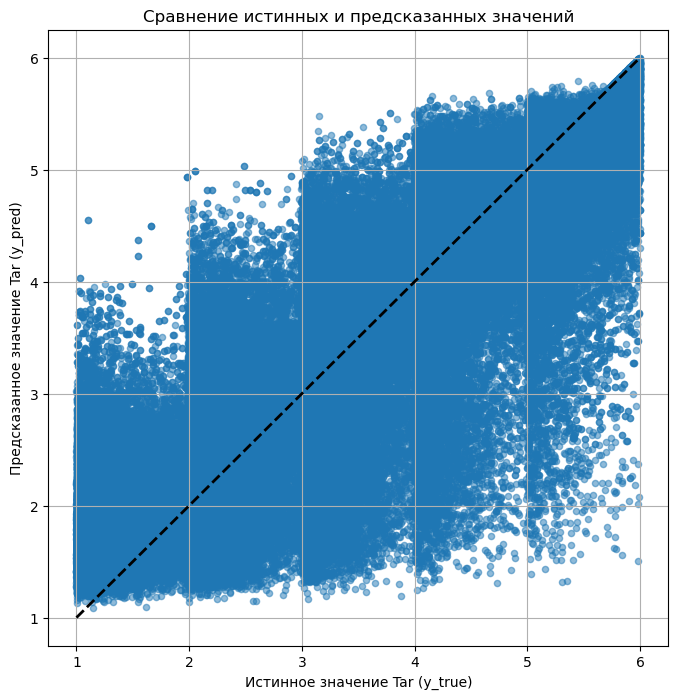


Final Metrics:
MAE: 0.4475, MSE: 0.4120, R2 Score: 0.8154, MAPE: 18.42%
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [2]:
# Загрузка данных
data = pd.read_csv("jets_features.csv")
X = data.drop('Tar', axis=1)
y = data['Tar']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Истинное значение Tar (y_true)')
plt.ylabel('Предсказанное значение Tar (y_pred)')
plt.title('Сравнение истинных и предсказанных значений')
plt.grid(True)
plt.show()


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Metrics:\nMAE: {mae:.4f}, MSE: {mse:.4f}, R2 Score: {r2:.4f}, MAPE: {mape:.2f}%")

print(model.get_params())

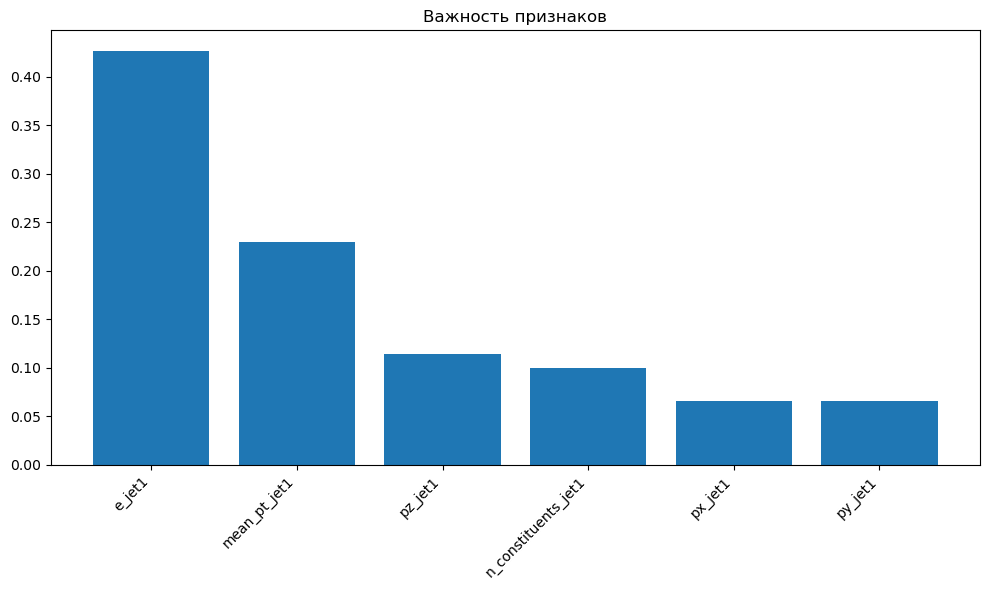

In [3]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

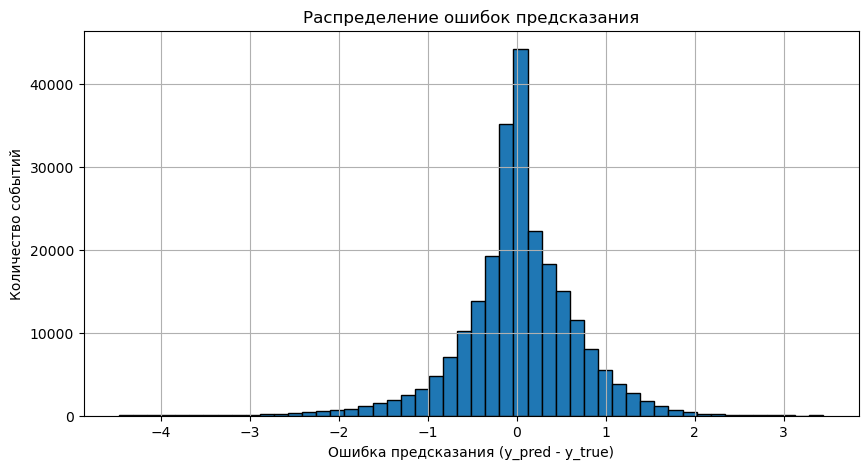

In [4]:
errors = y_pred - y_test
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('Ошибка предсказания (y_pred - y_true)')
plt.ylabel('Количество событий')
plt.title('Распределение ошибок предсказания')
plt.grid(True)
plt.show()